In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
## **Part 1: 데이터 수집 (Getting the Data)**

### 테슬라 주식 정보 (Ticker: TSLA on the NASDAQ)

테슬라(Tesla, Inc.)의 시장 데이터를 수집하기 위한 기본 설정 및 항목 정의입니다.

#### 1. 주식 기본 정보
* **종목명:** Tesla, Inc.
* **상장 시장:** NASDAQ
* **티커(Ticker):** `TSLA`
* **통화 단위:** USD (미국 달러)

#### 2. 데이터 수집 주요 항목
데이터프레임(DataFrame) 구축 시 포함되는 핵심 변수들입니다.

| 항목 (Korean) | 필드명 (English) | 설명 |
| :--- | :--- | :--- |
| **날짜** | `Date` | 거래가 발생한 날짜 (YYYY-MM-DD) |
| **시가** | `Open` | 장 시작 시점의 가격 |
| **고가** | `High` | 당일 최고 가격 |
| **저가** | `Low` | 당일 최저 가격 |
| **종가** | `Close` | 장 마감 시점의 가격 |
| **수정 종가** | `Adj Close` | 분할 및 배당이 반영된 종가 |
| **거래량** | `Volume` | 해당일의 총 거래 수량 |

#### 3. 데이터 소스 및 도구
* **Primary API:** `yfinance` (Yahoo Finance)
* **수집 기간:** 2012~2017




In [2]:
import pandas_datareader
import datetime as datetime

In [3]:
import yfinance as yf

In [8]:
# 수집 기간 설정
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [10]:
# 테슬라 주가 데이터 yahoo finance에서 가져오기
tesla = yf.download('TSLA',start=start,end=end,auto_adjust=False,progress=False)

In [6]:
tesla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2012-01-03,1.872000,1.872000,1.966667,1.843333,1.929333,13921500
2012-01-04,1.847333,1.847333,1.911333,1.833333,1.880667,9451500
2012-01-05,1.808000,1.808000,1.862000,1.790000,1.850667,15082500
2012-01-06,1.794000,1.794000,1.852667,1.760667,1.813333,14794500
2012-01-09,1.816667,1.816667,1.832667,1.741333,1.800000,13455000


In [7]:
# --- (선택 사항) 로컬 CSV 파일을 불러올 경우 ---
tesla = pd.read_csv('Tesla_Stock.csv')

# Date 컬럼을 시계열 타입으로 변환 후 인덱스로 지정 (날짜 기반 분석을 위해)
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla = tesla.set_index('Date')
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [8]:
tesla.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

---
### 기타 자동차 기업 (Other Car Companies)

**포드(Ford) 및 GM(General Motors)의 데이터를 수집하기 위해 앞서 테슬라(TSLA)와 동일한 단계를 반복합니다.**



In [9]:
ford = pd.read_csv('Ford_Stock.csv',parse_dates=['Date'],index_col='Date')
gm = pd.read_csv('GM_Stock.csv',parse_dates=['Date'],index_col='Date')

In [10]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [11]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


---
## **Part 2: 데이터 시각화 (Visualizing the Data)**

**수집된 주가 데이터를 바탕으로 시각화를 진행할 차례입니다.**

시각화를 통해 테슬라(Tesla), 포드(Ford), GM의 주가 흐름을 비교하고 시장의 트렌드를 파악합니다.  
주요 분석 포인트는 다음과 같습니다.
* **주가 변동 추이:** 시간의 흐름에 따른 종가(Close)의 변화
* **수익률 비교:** 특정 시점 대비 주가 상승폭 비교
* **거래량 분석:** 주가 급등락 시점의 거래량 변화 확인

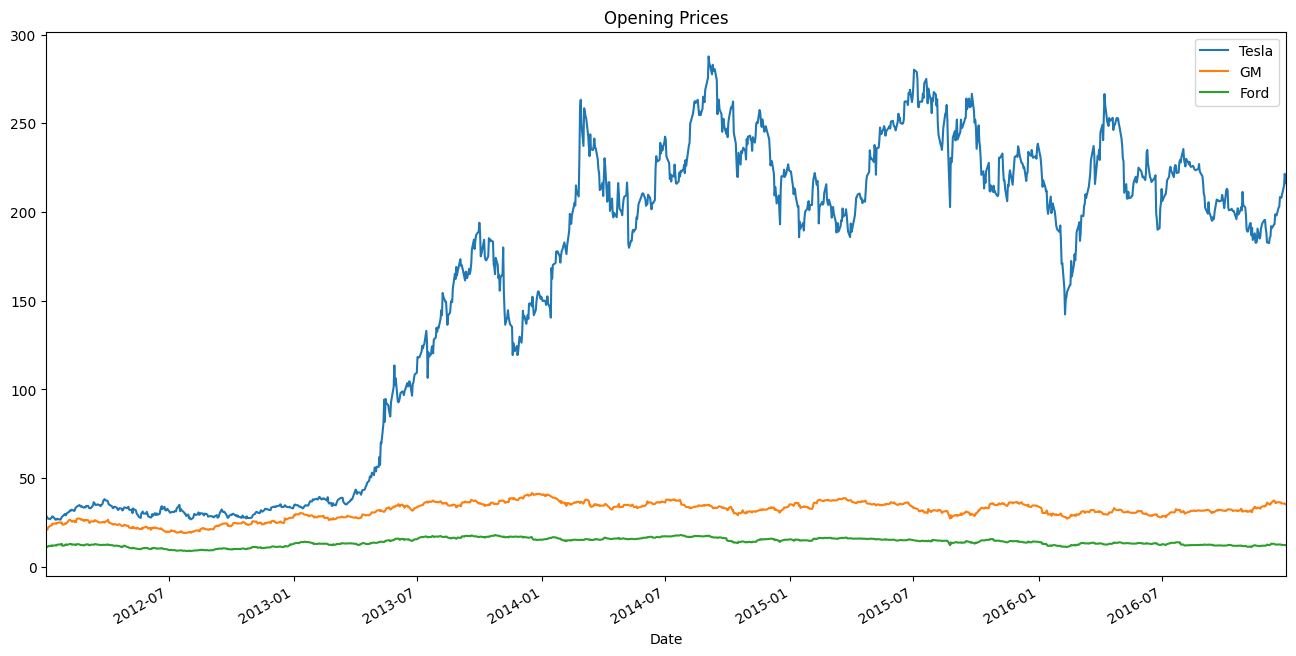

In [12]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')

plt.legend()
plt.margins(x=0)
plt.show()

### 📈 Opening Price Comparison (2012–2017)

- **Tesla** shows a sharp upward trend starting around 2013, clearly separating from Ford and GM. This indicates strong market expectations for future growth, accompanied by high volatility.
2013년 이후 주가가 급격히 상승하며 다른 두 기업과 완전히 다른 성장 궤적을 보입니다. 변동성은 크지만 시장의 강한 성장 기대가 지속적으로 가격에 반영된 모습입니다.

- **Ford** and **GM** remain within relatively narrow price ranges throughout the period. Their movements reflect mature automotive companies perceived as stable rather than high-growth assets.
전 기간 동안 좁은 가격 범위에서 횡보하며 안정적인 흐름을 유지합니다. 성숙 산업의 특성이 반영된 전형적인 패턴입니다.

**Summary:**  
Despite operating in the same industry, the market treated Tesla as a **growth-driven company**,  
while Ford and GM were priced as **stable, mature incumbents**.


____

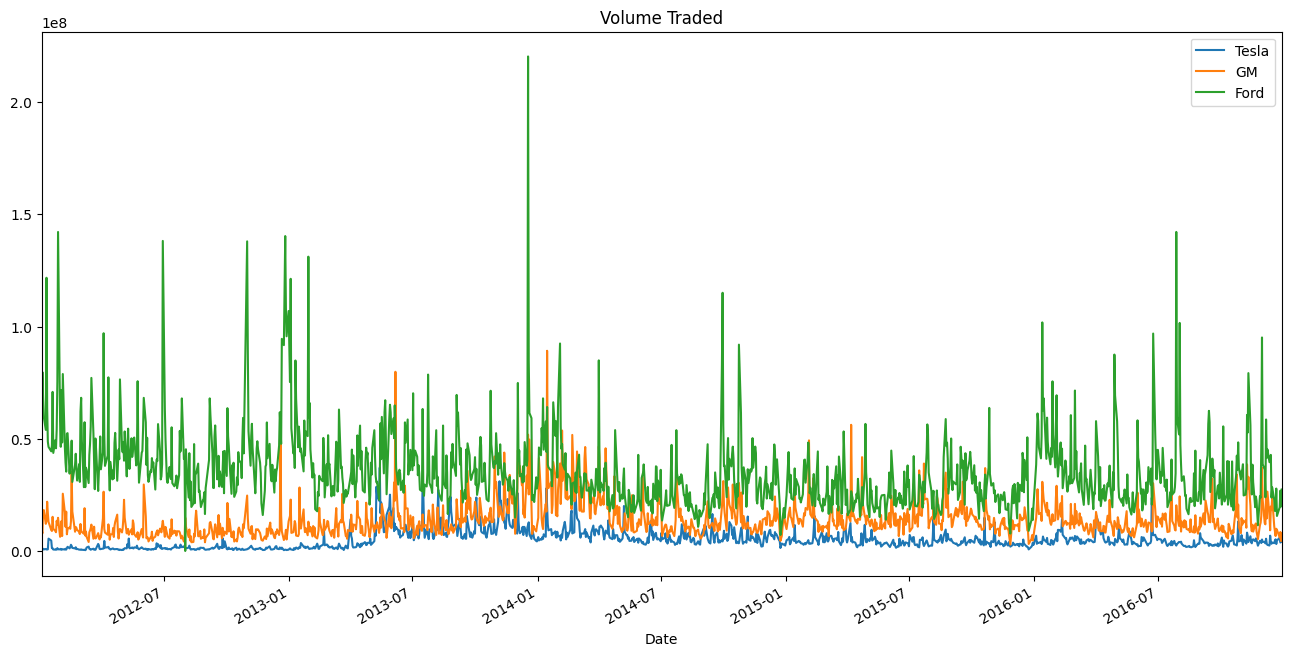

In [13]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')

plt.legend()
plt.margins(x=0)
plt.show()

### 📊 Trading Volume Comparison (2012–2017)

- **Ford** consistently shows the highest trading volume, indicating strong liquidity and broad market participation despite relatively stable prices.
거래량이 기간 내내 가장 큽니다. 가격은 안정적이지만, 시장 참여자가 많고 유동성이 매우 높은 전통적 대형주임을 보여줍니다.

- **GM** maintains moderate and steady trading volume, reflecting its position as a mature and actively traded automaker.
포드보다는 작지만 비교적 꾸준한 거래량을 유지합니다. 역시 안정적이고 많이 거래되는 종목입니다.
- **Tesla**, while experiencing significant price growth, exhibits noticeably lower trading volume. This suggests that Tesla was primarily driven by a smaller group of investors with strong growth expectations rather than broad market participation. 주가는 크게 상승했지만, 거래량은 두 회사보다 훨씬 작습니다.
이는 당시 테슬라가 소수의 투자자들이 강하게 베팅하던 성장주였음을 의미합니다.


**Summary:**  
During this period, Tesla led in price growth, whereas Ford and GM dominated in trading volume, highlighting the contrast between growth-driven and liquidity-driven stocks.  
가격은 테슬라가 주도했지만, 거래의 ‘양’은 포드와 GM이 지배하고 있던 시기입니다.


**관련 기사**

In [15]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

http://money.cnn.com/2013/12/18/news/companies/ford-profit/
https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf

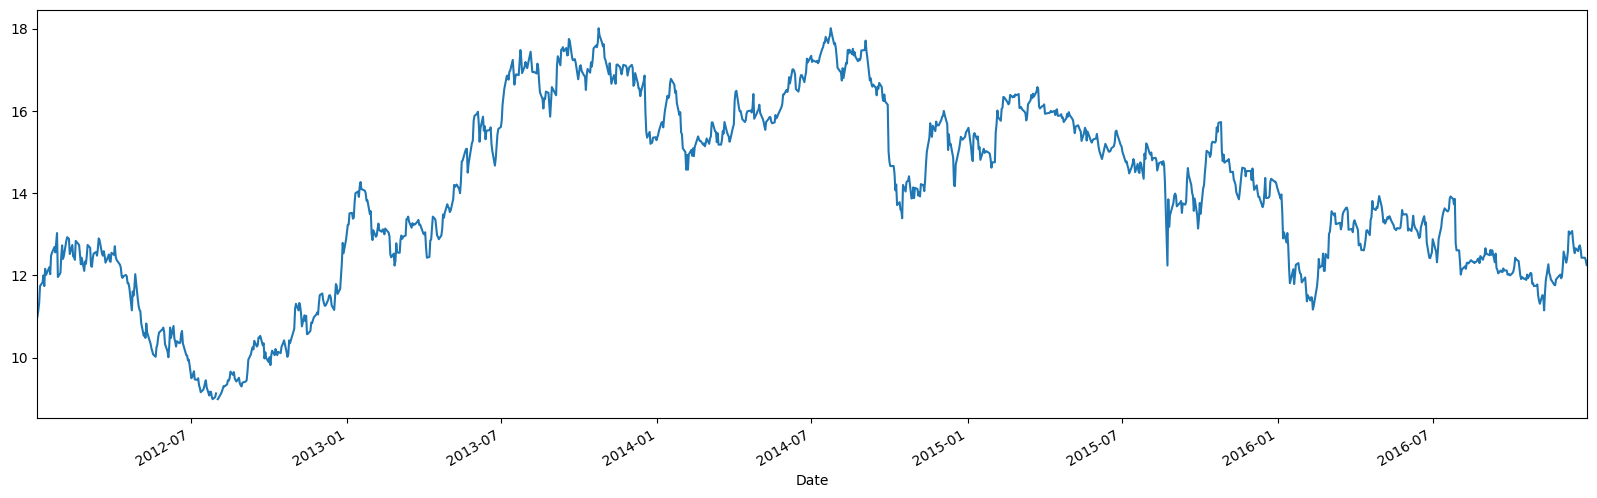

In [14]:
ford['Open'].plot(figsize=(20,6))

plt.margins(x=0)
plt.show()

### 📉 Ford Price Reaction (Late 2013 – Early 2014)

Although Ford appeared relatively stable when compared to Tesla, its standalone price chart shows a noticeable decline between late 2013 and early 2014.  
테슬라와 비교하면 포드는 상대적으로 안정적으로 보였지만,  
포드 단독 시계열로 보면 **2013년 말부터 2014년 초 사이에 뚜렷한 하락**이 확인됩니다.

This period aligns with Ford’s profit warning for 2014, indicating that negative forward-looking guidance was reflected in the stock price. While the magnitude of the drop was smaller than Tesla’s typical volatility, it was still significant for a mature automotive company.  
이 구간은 포드가 **2014년 이익 감소 전망을 경고한 시점**과 겹치며, 부정적인 미래 가이던스가 실제 주가에 반영된 사례로 해석할 수 있습니다. 하락 폭은 테슬라만큼 극단적이지는 않지만, **성숙 기업 기준에서는 의미 있는 조정**입니다.

**Summary:**  
Ford was perceived as a stable stock, but unfavorable earnings outlooks still led to clear price adjustments, especially when accompanied by spikes in trading volume.



In [16]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

### 💰 Total Traded Value (Open Price × Volume) Comparison

`Total Traded`는 시가(Open Price)와 거래량(Volume)을 곱해,  
각 시점마다 **시장에서 실제로 얼마나 많은 금액이 거래되었는지**를 근사적으로 보여주는 지표입니다.

- **Tesla**  
  2013년 이후 `Total Traded`가 급격히 증가하며 큰 스파이크가 반복됩니다. 이는 주가 상승과 거래 참여 증가가 동시에 발생했음을 의미하며, **시장 자금이 테슬라로 집중되기 시작한 시기**로 해석할 수 있습니다.

- **Ford, GM**  
  전반적으로 안정적인 범위에서 움직입니다. 거래량은 많았지만 주가가 낮아, **실제로 이동한 자금 규모는 테슬라보다 제한적**이었습니다.

**요약:**  
테슬라는 가격과 거래량이 함께 커지며 자금 집중이 발생한 성장주였고, 포드와 GM은 안정적인 거래가 지속되는 성숙 기업의 특성을 보였습니다.

<br>

`Total Traded` is calculated as Open Price multiplied by Volume and serves as a proxy for **the total amount of money traded in the market at each point in time**.

- **Tesla**  
  After 2013, `Total Traded` rises sharply with frequent large spikes. This indicates that price appreciation and trading participation increased simultaneously, suggesting **a strong concentration of market capital flowing into Tesla**.

- **Ford and GM**  
  Both exhibit relatively stable ranges over time. Despite higher trading volumes, lower stock prices resulted in **a smaller total amount of capital traded compared to Tesla**.

**Summary:**  
Tesla experienced significant capital concentration alongside price growth, while Ford and GM maintained characteristics of mature companies with stable trading activity.


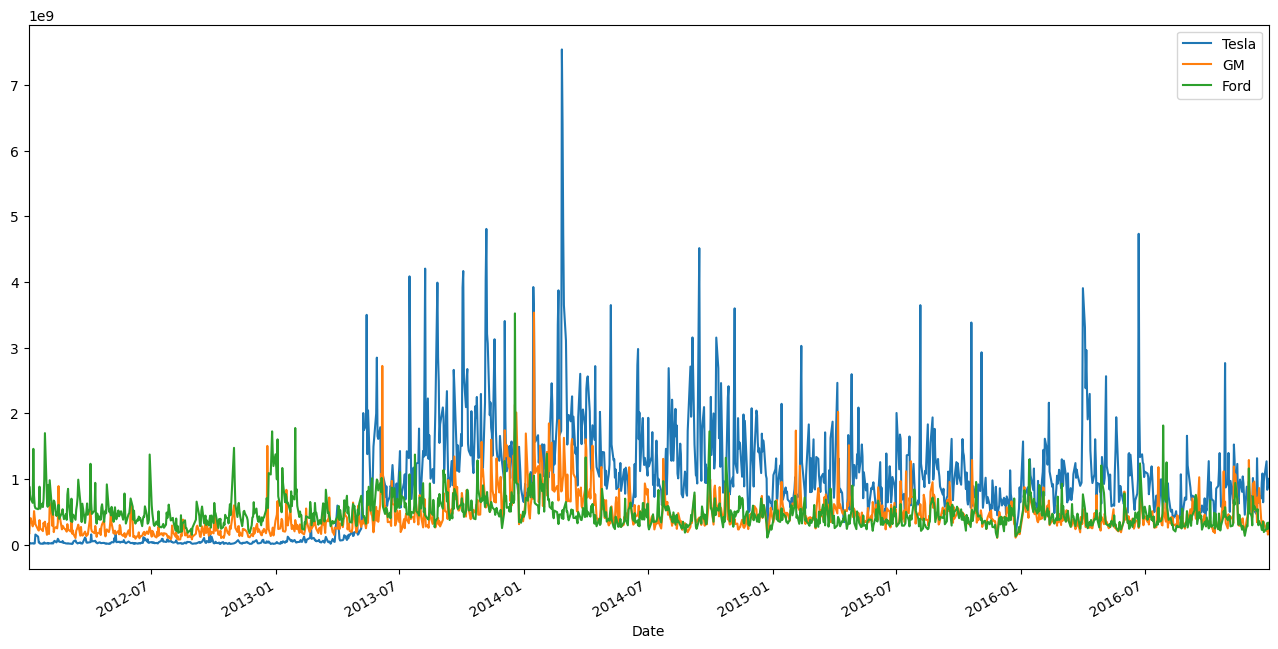

In [17]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')

plt.legend()
plt.margins(x=0)
plt.show()

**관련 기사**

In [18]:
tesla['Total Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

http://money.cnn.com/2014/02/25/investing/tesla-record-high/
https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/  
http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

<br>

____

### 이동평균선(MA) 분석

이동평균선(Moving Averages) 시각화를 통해 주가의 장단기 추세를 파악합니다.  
GM(제너럴 모터스) 데이터를 활용하여 50일 이동평균선(MA50)과 200일 이동평균선(MA200)을 차트에 그립니다.

#### 분석 포인트
* **MA50 (단기 추세):** 최근 50일간의 평균 주가로, 단기적인 가격 흐름을 반영함.
* **MA200 (장기 추세):** 최근 200일간의 평균 주가로, 장기적인 추세 전환이나 지지/저항선을 확인하는 데 사용됨.
* **골든크로스/데드크로스:** 두 이평선의 교차 지점을 통해 매수/매도 타이밍을 가늠해볼 수 있음.

<br>

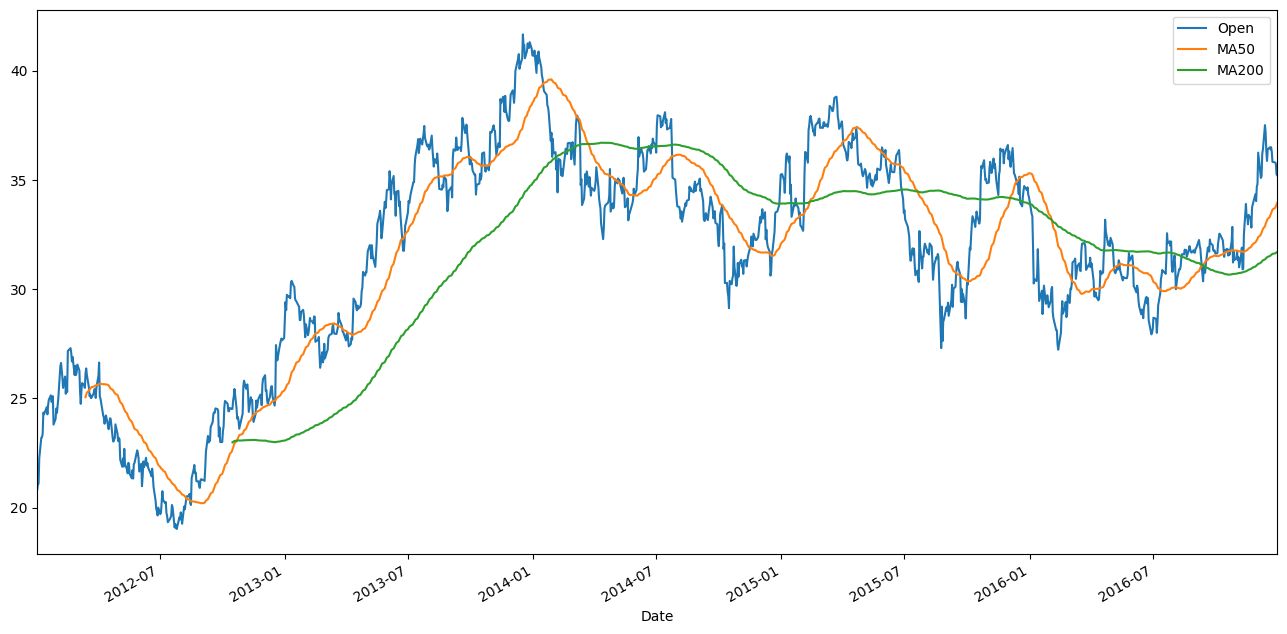

In [19]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

plt.margins(x=0)
plt.show()

### 📈 Moving Average Analysis (GM Open Price)

- **Trend identification**  
  The GM open price broadly follows the MA200, indicating a clear long-term trend.

- **Short vs long-term signals**  
  MA50 reacts quickly to short-term price changes, while MA200 smooths out noise and shows long-term direction.

- **Momentum insight**  
  When the price remains above MA50 and MA200, it suggests bullish momentum.  
  Frequent crossings indicate a sideways or volatile market.

<br>

- **추세 파악**  
  GM 시가(Open)는 전반적으로 MA200의 방향을 따라가며 장기 추세를 잘 보여줍니다.

- **단기 vs 장기 신호**  
  MA50은 단기 변동에 민감하고, MA200은 노이즈를 제거한 장기 흐름을 나타냅니다.

- **모멘텀 해석**  
  가격이 MA50과 MA200 위에 유지되면 상승 모멘텀으로 해석할 수 있으며,  
  잦은 교차는 횡보 또는 변동성 구간을 의미합니다.

<br>

______

### 자동차 종목 간 상관관계 분석

마지막으로 각 종목들 사이에 어떤 상관관계가 있는지 확인합니다. 모두 자동차 산업이라는 공통분모를 가지고 있는 만큼, 주가의 흐름이 비슷하게 움직이는지 산점도 행렬(Scatter Matrix Plot)을 통해 시각화합니다.


#### 분석 방법
* **목적:** 테슬라, 포드, GM의 시가(Opening Price) 데이터를 한데 모아 종목 간의 상관계수와 분포를 한눈에 파악함.
* **도구:** `pandas.plotting`의 `scatter_matrix`를 활용함.
* **데이터 준비:** 각 데이터프레임에 흩어져 있는 'Open' 컬럼들을 하나의 새로운 데이터프레임으로 합치는 작업이 필요함.
<br>

In [20]:
# 1. 각 종목의 시가(Open) 데이터를 하나의 데이터프레임으로 결합
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


In [21]:
import seaborn as sns

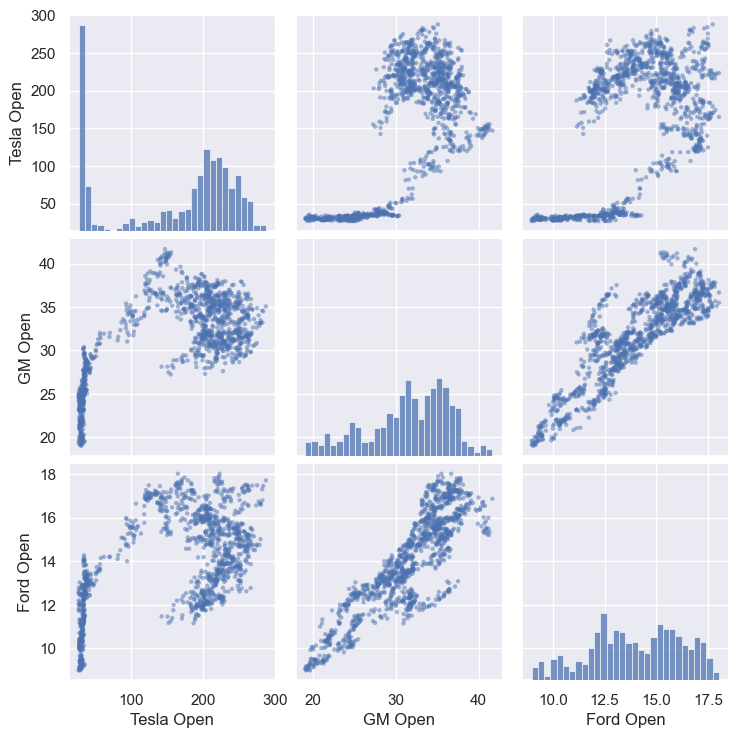

In [22]:
# 2. 산점도 행렬(Scatter Matrix) 생성
sns.set_theme()

sns.pairplot(
    car_comp,
    diag_kind='hist',
    diag_kws={'bins': 30},
    plot_kws={'edgecolor': 'none','s': 10,'alpha':0.5},
);

### 🔍 Scatter Matrix Analysis (Tesla, GM, Ford – Open Price)


- **Distribution differences**  
  Tesla shows a much wider price range and higher volatility compared to GM and Ford.  Tesla는 GM과 Ford에 비해 가격 범위가 넓고 변동성이 매우 큼

- **Correlation insight**  
  GM and Ford exhibit a strong positive linear relationship, suggesting similar market behavior. GM과 Ford는 강한 양의 선형 관계를 보여 비슷한 시장 흐름을 따름

- **Non-linear pattern**  
  Tesla’s distribution appears non-linear, reflecting company-specific growth expectations and speculation. Tesla는 비선형적인 분포를 보이며, 개별 기업 이슈와 성장 기대가 크게 반영된 움직임


<br><br>


In [25]:
import mplfinance as mpf

In [39]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1257 non-null   float64
 1   High          1257 non-null   float64
 2   Low           1257 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Total Traded  1257 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 101.1 KB


In [28]:
ford[['Open','High','Low','Close']].isna().sum()

Open     1
High     1
Low      1
Close    0
dtype: int64

In [30]:
ford[ford[['Open','High','Low','Close']].isna().any(axis=1)]

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-08-01,NaN,NaN,NaN,9.24,0,NaN


---
## **Part 3: 기초 금융 분석 (Basic Financial Analysis)**

이제 몇 가지 핵심적인 금융 계산에 집중해 볼 차례입니다.  
이 섹션은 수학적 공식이나 개념을 파이썬과 판다스 코드로 변환하는 연습 과정이며, 향후 정량 데이터(Quantitative Data)를 다룰 때 자주 사용하게 될 기법들입니다.
<br><br>


### 일간 수익률 (Daily Percentage Change)

가장 먼저 각 종목의 일간 수익률을 계산합니다. 일간 수익률($r_t$)의 정의는 다음과 같습니다.

#### $$r_t = \frac{p_t}{p_{t-1}} - 1$$

- **$p_t$**: $t$ 시점(당일)의 가격
- **$p_{t-1}$**: $t-1$ 시점(전일)의 가격

이 수치는 전날 주식을 사서 다음 날 팔았을 때의 수익(또는 손실) 비율을 의미합니다. 미래 주가를 예측하는 데 직접적인 도구는 아니지만, 주식의 **Volatility**을 분석하는 데 매우 유용합니다. 수익률의 분포가 넓을수록 해당 주식은 일일 변동성이 크다는 것을 의미합니다.
<br><br>

#### 분석 작업
1. 각 종목 데이터프레임에 `returns`라는 새로운 컬럼을 추가.
2. 계산은 `Close`(종가) 컬럼을 기준으로 함.
3. 방법은 두 가지.
    * `.shift(1)` 메소드를 활용해 수식을 직접 코드로 구현
    * 판다스의 내장 함수인 `.pct_change()` 활용

<br><br>

In [81]:
tesla['Close']

Date
2012-01-03     28.08
2012-01-04     27.71
2012-01-05     27.12
2012-01-06     26.89
2012-01-09     27.25
               ...  
2016-12-23    213.34
2016-12-27    219.53
2016-12-28    219.74
2016-12-29    214.68
2016-12-30    213.69
Name: Close, Length: 1258, dtype: float64

In [82]:
tesla['Close'].shift(1)

Date
2012-01-03       NaN
2012-01-04     28.08
2012-01-05     27.71
2012-01-06     27.12
2012-01-09     26.89
               ...  
2016-12-23    208.45
2016-12-27    213.34
2016-12-28    219.53
2016-12-29    219.74
2016-12-30    214.68
Name: Close, Length: 1258, dtype: float64

In [83]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

In [87]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [92]:
tesla.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [93]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [118]:
gm.head()

,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


---

### 수익률 히스토그램 및 변동성 분석

각 기업의 수익률(`returns`) 분포를 히스토그램으로 시각화하여 어떤 종목의 변동성이 가장 큰지 비교해 보니다.  
수익률의 분포(분산)가 넓게 퍼져 있을수록 일일 주가 변동이 심한, 즉 변동성이 높은 주식으로 판단할 수 있습니다.


#### 분석 방법
* **히스토그램:** 각 종목의 수익률을 개별적으로 그리거나, 한 차트에 겹쳐서(Stack/Overlay) 분포의 폭을 비교한다.
* **변동성 판단:** 그래프의 가로축이 넓게 퍼져 있고 꼬리가 길수록 변동성이 크다는 것을 의미한다.

<br>

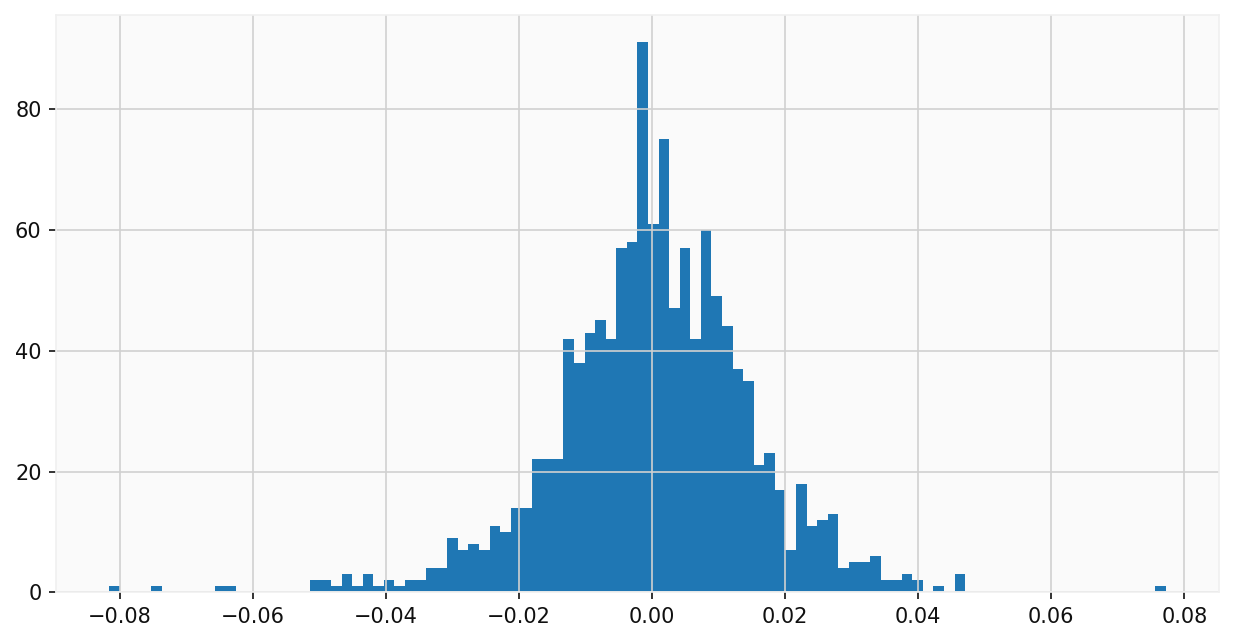

In [103]:
plt.figure(figsize=(10,5),dpi=150)
ford['returns'].hist(bins=100);

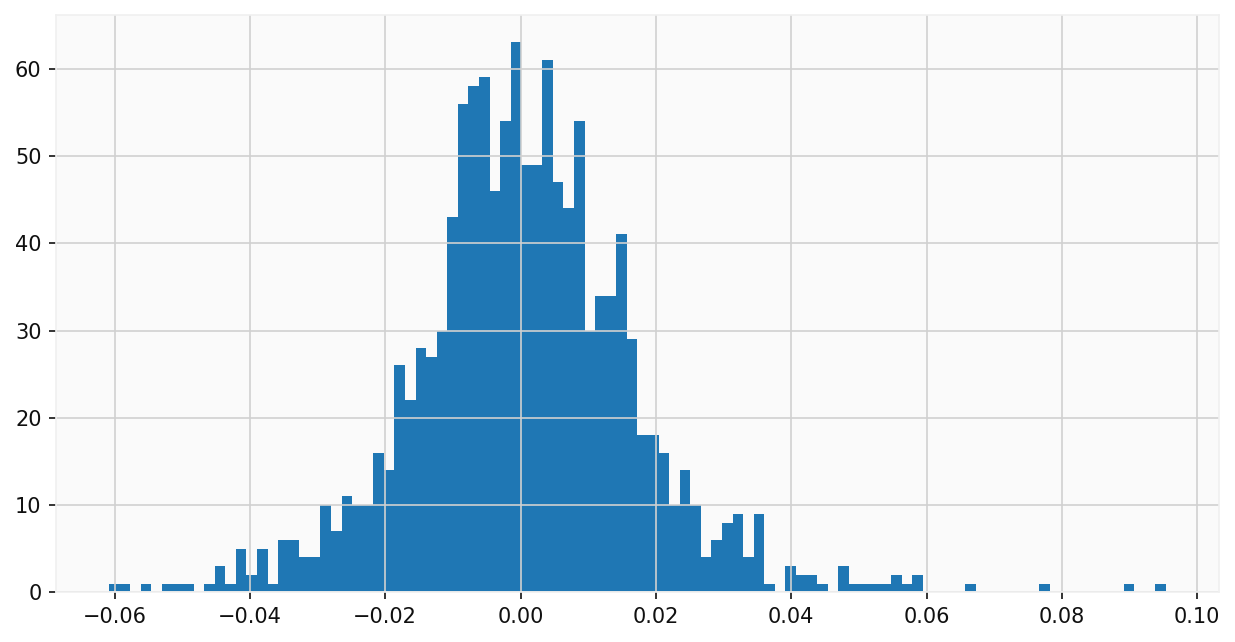

In [104]:
plt.figure(figsize=(10,5),dpi=150)
gm['returns'].hist(bins=100);

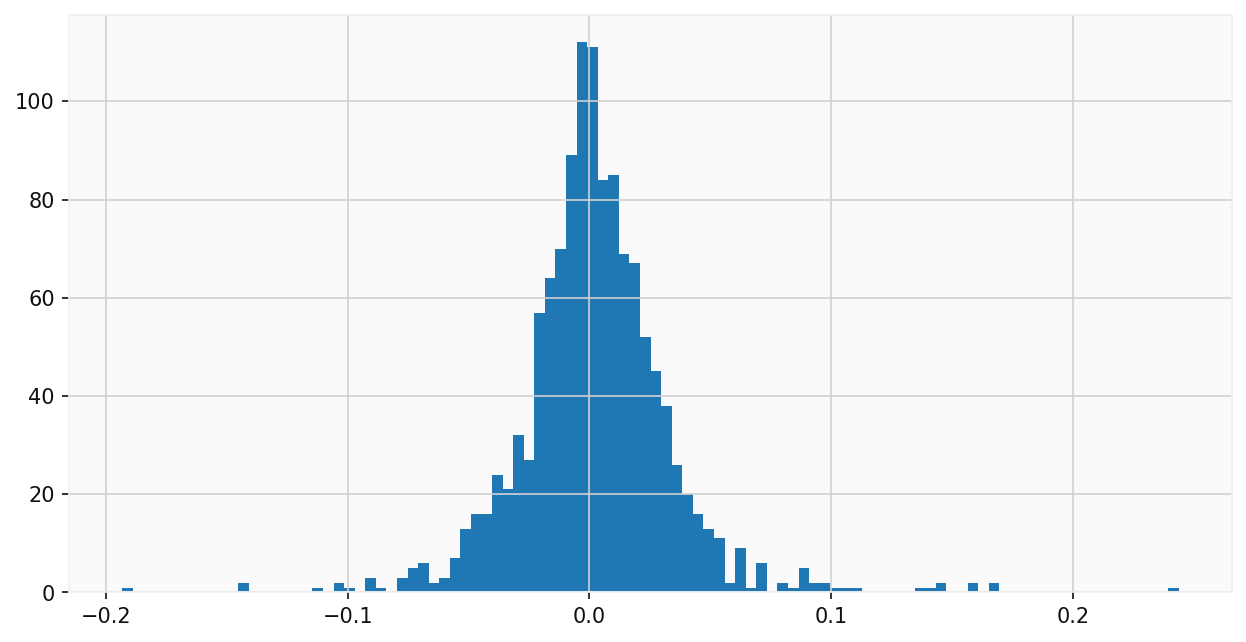

In [105]:
plt.figure(figsize=(10,5),dpi=150)
tesla['returns'].hist(bins=100);

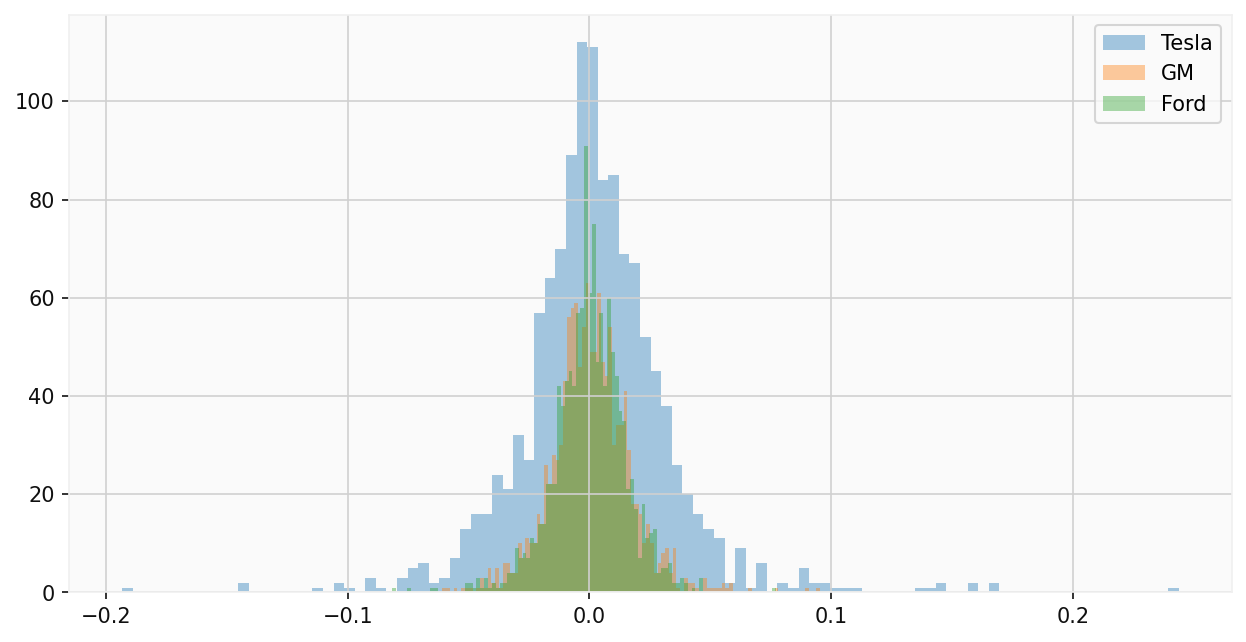

In [108]:
plt.figure(figsize=(10,5),dpi=150)

tesla['returns'].hist(bins=100,label='Tesla',alpha=0.4)
gm['returns'].hist(bins=100,label='GM',alpha=0.4)
ford['returns'].hist(bins=100,label='Ford',alpha=0.4)

plt.legend()
plt.show()

### 📊 Daily Returns Distribution (Histogram)


**Key Findings**
- **Tesla** shows a wide and flat return distribution, indicating high volatility and frequent extreme price movements. 분포가 넓고 꼬리가 길어 변동성이 매우 큼.
- **GM** has a moderately concentrated distribution around zero, implying medium volatility. 0 근처에 비교적 집중되어 중간 수준의 변동성을 보임.
- **Ford** exhibits a narrow distribution tightly centered around zero, indicating the lowest volatility among the three. 분포가 가장 좁고 0에 집중되어 변동성이 가장 낮음.

**Conclusion**
> Tesla is a high-risk, high-volatility asset, while GM and Ford demonstrate more stable return characteristics.
> Tesla는 고위험·고변동성 자산이며, GM과 Ford는 상대적으로 안정적인 저변동성 자산으로 해석됨

<br>



---
### 커널 밀도 추정(KDE) 분석

히스토그램 외에 또 다른 관점으로 데이터를 보기 위해 KDE(Kernel Density Estimation) 그래프를 그려봅니다. 세 종목 중 어떤 그래프가 가장 옆으로 넓게 퍼져 있는지 비교하여 변동성을 재확인할 수 있습니다.



#### 분석 포인트
* **KDE 그래프:** 히스토그램의 급격한 계단 모양을 매끄러운 곡선으로 추정하여 데이터의 밀도를 더 직관적으로 보여줌.
* **폭과 높이:** 그래프의 높이가 낮고 옆으로 넓게 퍼질수록 해당 종목의 수익률이 일정하지 않고 변동성이 크다는 것을 의미함.

<br>

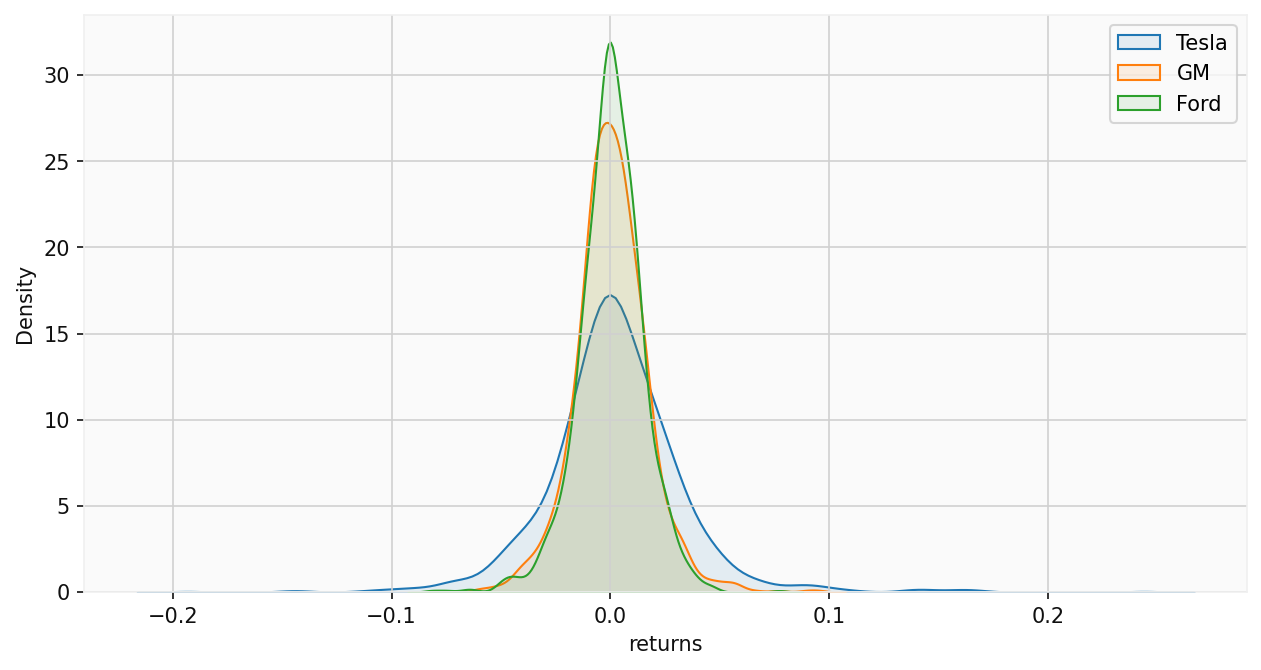

In [113]:
import seaborn as sns

plt.figure(figsize=(10,5),dpi=150)

sns.kdeplot(tesla['returns'], fill=True, alpha=0.1, label='Tesla')
sns.kdeplot(gm['returns'], fill=True, alpha=0.1, label='GM')
sns.kdeplot(ford['returns'], fill=True, alpha=0.1, label='Ford')

plt.legend()
plt.show()

### 📈 Daily Returns Distribution (KDE)



**Key Findings**
- **Tesla** shows the widest KDE curve with long tails, indicating the highest volatility.  
  KDE 곡선이 넓고 꼬리가 길어 변동성이 가장 큼
- **GM** displays a narrower distribution centered around zero, suggesting moderate volatility.  
  0 근처에 분포가 집중되어 중간 수준의 변동성을 보임
- **Ford** has the sharpest and most concentrated peak near zero, indicating the lowest volatility.  
  가장 뾰족하고 좁은 분포를 가지며 변동성이 가장 낮음

**Conclusion**
> KDE analysis confirms that Tesla carries significantly higher volatility, while GM and Ford exhibit more stable return distributions.  
> KDE 분석 결과, Tesla는 고변동성 자산이며 GM과 Ford는 상대적으로 안정적인 수익률 구조를 보임

<br>

---
### 박스 플롯(Box Plot)을 이용한 수익률 비교

수익률의 분포와 이상치(Outlier)를 더 명확하게 확인하기 위해 박스 플롯을 생성해 봅니다.  
이를 통해 각 종목의 변동성과 수익률 범위를 한눈에 비교할 수 있습니다.


#### 분석 포인트
* **박스의 길이:** 박스(사분위 범위)가 길수록 수익률의 변동 폭이 크다는 것을 의미함.
* **수염(Whiskers)과 점(Outliers):** 수염 밖의 점들은 평소보다 극단적인 주가 변동이 있었던 날들을 나타냄.
* **중앙선:** 박스 내부의 선은 수익률의 중앙값을 나타내며, 0 근처에 위치하는지 확인.
<br>

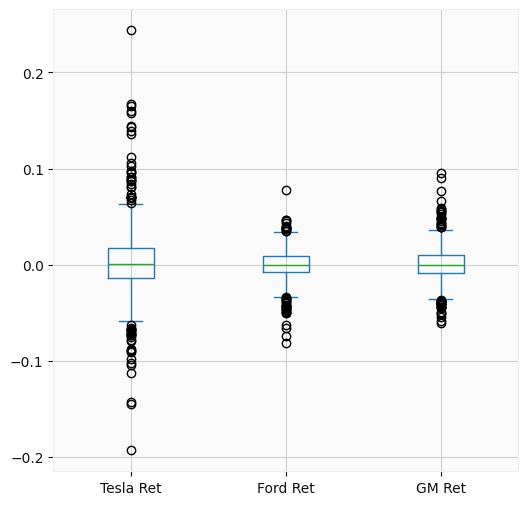

In [129]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns = ['Tesla Ret', 'Ford Ret', 'GM Ret']

box_df.plot(kind='box', figsize=(6,6))

plt.show()

### 📦 Daily Returns Distribution (Box Plot)


**Key Findings**
- **Tesla** exhibits the widest interquartile range and the most extreme outliers, indicating high volatility and significant tail risk.  
  사분위 범위(IQR)가 가장 넓고 이상치가 가장 많아 변동성과 꼬리 위험이 큼
- **GM** shows moderate dispersion with fewer extreme values.  
  중간 수준의 분산과 제한된 이상치를 보임
- **Ford** has the narrowest box and shortest whiskers, indicating the lowest volatility.  
박스와 수염이 가장 짧아 변동성이 가장 낮음

**Conclusion**
> The box plot confirms that Tesla carries substantially higher downside and upside risk, while Ford and GM display more stable return behavior.  
> 박스플롯 분석 결과, Tesla는 높은 변동성과 극단적 수익률 위험을 가지며, Ford와 GM은 상대적으로 안정적인 수익률 구조를 보임


<br>

---
### 종목 간 일간 수익률 상관관계 분석

각 종목의 일간 수익률 데이터를 활용해 산점도 행렬(Scatter Matrix Plot)을 생성하고, 기업 간의 상관관계를 분석합니다. 이를 통해 자동차 산업군 내 기업들이 얼마나 유사하게 움직이는지, 특히 시장이 테슬라를 일반적인 자동차 기업으로 보는지 아니면 기술주(Tech Company)로 판단하는지 살펴봅니다.



#### 분석 포인트
* **상관관계 확인:** 산점도 내 점들이 직선 형태에 가깝게 모여 있을수록 두 종목의 수익률이 비슷하게 움직임을 의미함.
* **산업군 내 동질성:** 포드와 GM의 상관관계가 높은지, 그리고 테슬라가 이들과 얼마나 동조화(Coupling) 되어 있는지 확인.
* **테슬라의 성격:** 만약 테슬라가 다른 자동차 기업들과 낮은 상관관계를 보인다면, 시장은 테슬라를 전통적인 자동차 제조사와는 다른 섹터(기술주 등)로 분류하고 있을 가능성이 높음.

<br>

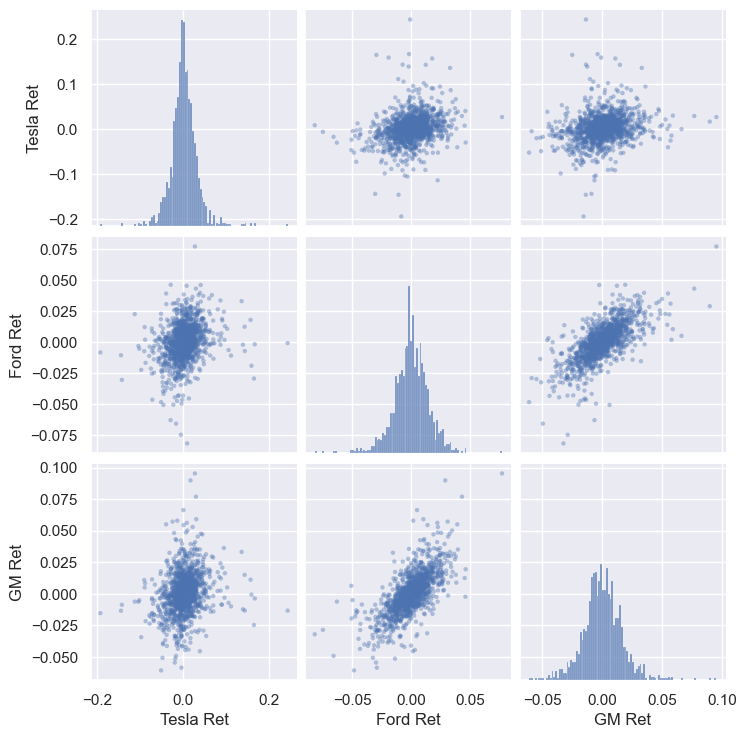

In [132]:
sns.set_theme()

sns.pairplot(
    box_df,
    diag_kind='hist',
    diag_kws={'bins': 100},
    plot_kws={'edgecolor': 'none','s': 10,'alpha':0.4},
);

### 🔗 Scatter Matrix: Daily Returns Correlation Analysis

This scatter matrix visualizes the pairwise relationship between daily returns of Tesla, Ford, and GM to assess how closely the market treats these companies.

**Key Observations**
- **Ford vs GM**
  - Displays a clear positive linear relationship.
  - Indicates strong correlation and similar market behavior.
- **Tesla vs Ford / GM**
  - Shows weaker and more dispersed relationships.
  - Correlation is noticeably lower compared to Ford–GM.

**Interpretation**
- Ford and GM returns move together, suggesting they are priced primarily as traditional automobile manufacturers.  
  Ford와 GM은 수익률 간 강한 양의 상관관계를 보이며 동일 산업군 특성이 뚜렷함
- Tesla’s returns are less synchronized with Ford and GM, implying different underlying drivers.  
  Tesla는 Ford·GM과의 상관관계가 상대적으로 낮아 독립적인 움직임을 보임

**Conclusion**
> The scatter matrix suggests that Tesla is not treated purely as a traditional car company.  
> Its weaker correlation with Ford and GM supports the view that the market prices Tesla more like a technology-oriented or growth-driven firm.  
> 시장은 Tesla를 전통적인 자동차 기업이라기보다 기술·성장 중심 기업에 가깝게 평가하고 있는 것으로 해석 가능함

<br>


### 포드(Ford)와 GM의 수익률 상관관계 심화 분석

이전 산점도 행렬에서 포드와 GM이 밀접한 관계가 있음을 확인했습니다. 두 기업 모두 전통적인 내연기관 자동차 제조사로서 시장에서 유사하게 평가받는지 확인하기 위해, 두 종목만을 따로 떼어 산점도(Scatter Plot)를 그려보고 더 자세히 살펴보겠습니다.


#### 분석 포인트
* **선형성 확인:** 점들이 우상향하는 직선 형태에 가까울수록 두 기업의 주가가 같은 방향으로 움직이는 경향이 강함을 의미함.
* **산업군 동조화:** 특정 거시 경제 변수(금리, 유가 등)가 자동차 산업 전체에 미치는 영향이 두 기업에 얼마나 비슷하게 작용하는지 가늠해 볼 수 있음.

<br>

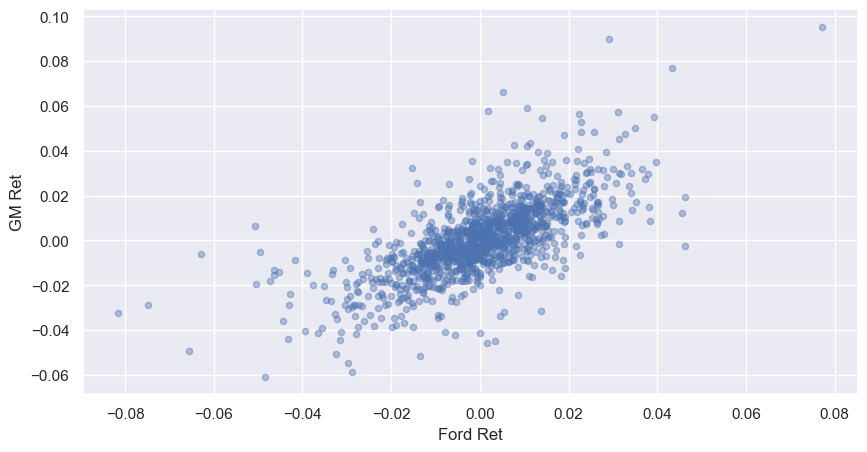

In [135]:
box_df.plot(kind='scatter',x='Ford Ret',y='GM Ret',alpha=0.4,figsize=(10,5));

**산점도(Scatter Plot)를 통해 두 기업의 일간 수익률을 비교해본 결과, 예상대로 강한 상관관계가 관찰됩니다.**  
따라서 포트폴리오 구성 시 두 종목을 동시에 보유하는 것은 분산 투자 효과가 낮을 수 있으며, 향후 테슬라와의 상관관계와 비교했을 때 이들의 '전통 제조사'로서의 특징이 더욱 극명하게 대비될 것으로 보입니다.
<br><br>

---
### 누적 수익률 (Cumulative Daily Returns) 분석

일간 수익률의 변동 폭을 확인한 결과, 테슬라가 가장 다이내믹한 움직임을 보였다는 것을 알 수 있었습니다. 이제 단순히 하루하루의 변동을 넘어, 분석 시작 시점에 1달러를 투자했을 때 오늘날 그 가치가 어떻게 변했을지 '누적 수익률'을 통해 확인해보겠습니다.


#### 분석 포인트
* **의미:** 시계열의 시작점에서 1달러를 투자했다고 가정했을 때의 현재 가치.
* **차이점:** 단순히 현재 주가를 보는 것과 달리, 일간 수익률이 매일 어떻게 복리로 누적되었는지를 보여줌.
* **제약 사항:** 본 분석의 단순 계산식에서는 배당금(Dividend) 재투자 요소는 고려하지 않음.

#### 누적 수익률 공식
누적 수익률($i_t$)은 다음과 같은 방식으로 계산됩니다.
#### $$i_t = (1 + r_t) \times i_{t-1}$$
*(여기서 $r_t$는 당일 수익률)*
<br><br>

---
### 종목별 누적 수익률 컬럼 생성

앞서 정리한 공식을 바탕으로 테슬라, 포드, GM 각 데이터프레임에 `Cumulative Return` 컬럼을 추가합니다.  
이를 통해 시간이 흐름에 따라 투자 가치가 어떻게 불어났는지 추적할 수 있습니다.
<br><br>

In [138]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

In [139]:
tesla

,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,0.013388,0.970442
...,...,...,...,...,...,...,...,...
2016-12-23,208.00,213.45,207.71,213.34,4670464,9.714565e+08,0.023459,7.597578
2016-12-27,214.88,222.25,214.42,219.53,5915732,1.271172e+09,0.029015,7.818020
2016-12-28,221.53,223.80,217.20,219.74,3782456,8.379275e+08,0.000957,7.825499


---
### 누적 수익률 시각화 및 최종 성과 비교

이제 계산된 누적 수익률 데이터를 시간의 흐름에 따라 그래프로 그려봅니다.  
2012년 초에 각 기업에 1달러를 투자했을 때, 기간이 끝나는 시점에 어떤 주식이 가장 높은 가치를 창출했는지, 그리고 어떤 주식이 가장 낮은 성과를 보였는지 한눈에 비교할 수 있습니다.
<br><br>

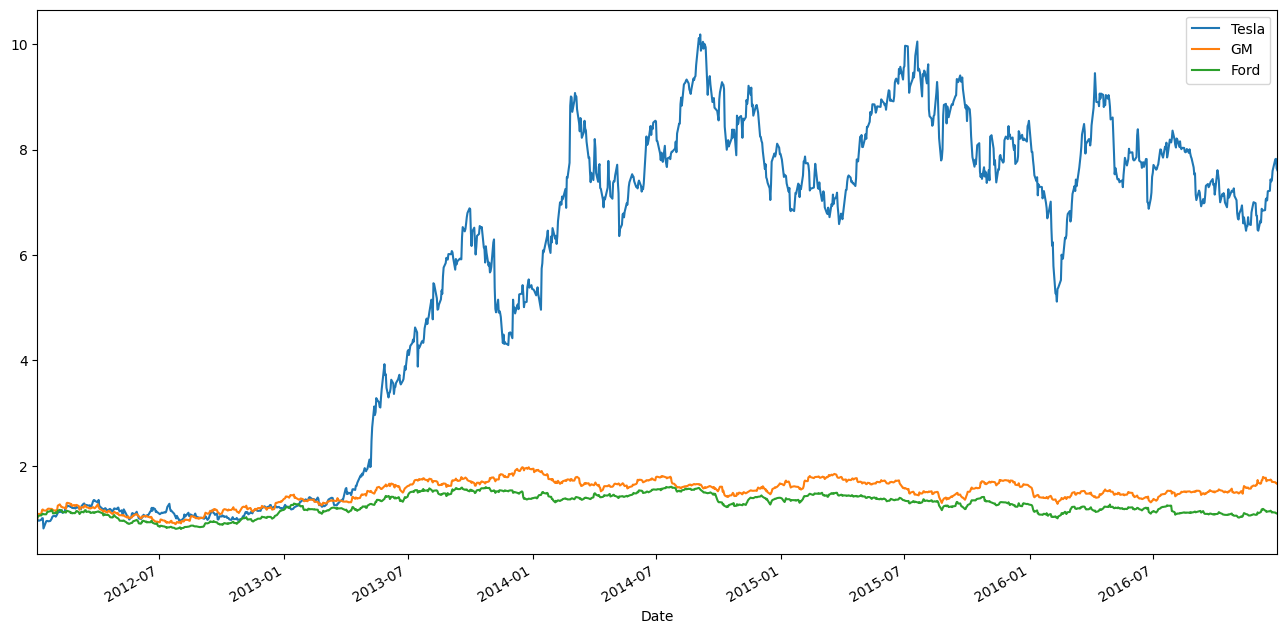

In [146]:
plt.style.use('default')

tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
gm['Cumulative Return'].plot(label='GM',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')

plt.legend()
plt.margins(x=0)
plt.show()

### 📈 Cumulative Return Analysis

- The cumulative return chart compares long-term compounded performance.
- Tesla shows strong exponential growth, significantly outperforming GM and Ford.
- GM achieves moderate cumulative gains with noticeable volatility.
- Ford remains relatively flat, indicating weak long-term compounding.
- The market appears to price Tesla as a high-growth asset rather than a traditional automaker.

<br>

- 누적 수익률 그래프는 복리 기준의 장기 성과를 비교한다.
- Tesla는 강한 복리 성장을 보이며 GM과 Ford를 크게 상회한다.
- GM은 변동성을 동반한 완만한 누적 수익을 기록한다.
- Ford는 전반적으로 정체된 흐름을 보여 장기 누적 성과가 낮다.
- 시장은 Tesla를 전통 자동차 기업이 아닌 고성장 자산으로 평가한 것으로 보인다.
<br>

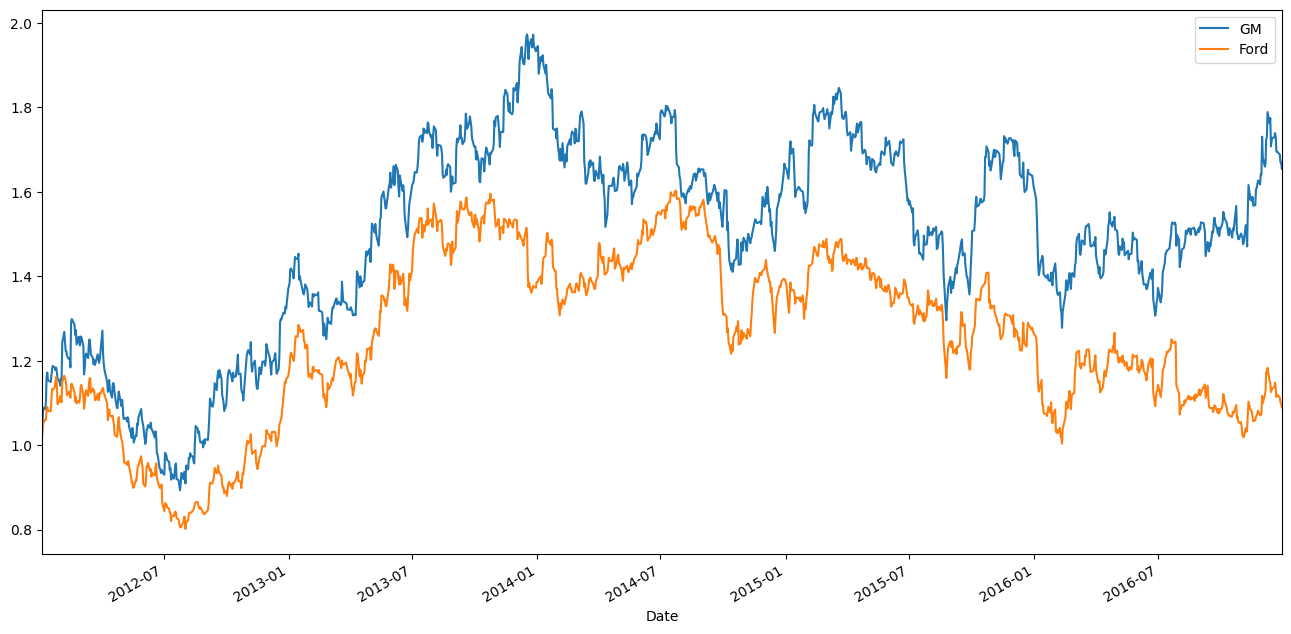

In [147]:
plt.style.use('default')

# tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8))
gm['Cumulative Return'].plot(label='GM',figsize=(16,8))
ford['Cumulative Return'].plot(label='Ford')

plt.legend()
plt.margins(x=0)
plt.show()